# Shap Exploration

# Imports

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
# load JS visualization code to notebook
shap.initjs()

# Data

In [2]:
X,y = shap.datasets.nhanesi()
del X['Unnamed: 0']

# add dummy for missing
for c in X.columns:
    if X[c].isna().sum() > 0:
        X['na_'+c] = X[c].isna()*1

# split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, test_size=0.1)

# impute based on train median
train_medians = X_train.median().to_dict()
X_train = X_train.fillna(train_medians)
X_test = X_test.fillna(train_medians)

# fit
model = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)

# Fit Shap

In [17]:
# Fit explainer model
explainer = shap.TreeExplainer(model)
# Calculate shap values
shap_values = explainer.shap_values(X_test)

In [18]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
idx = 0
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test.iloc[idx,:])

In [5]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_test)

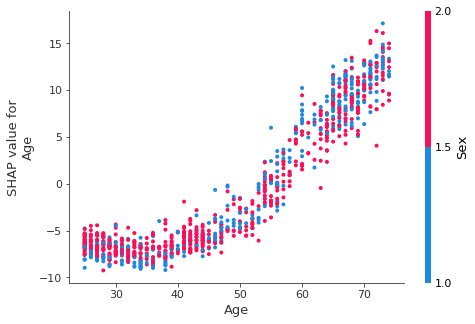

In [6]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Age", shap_values, X_test)

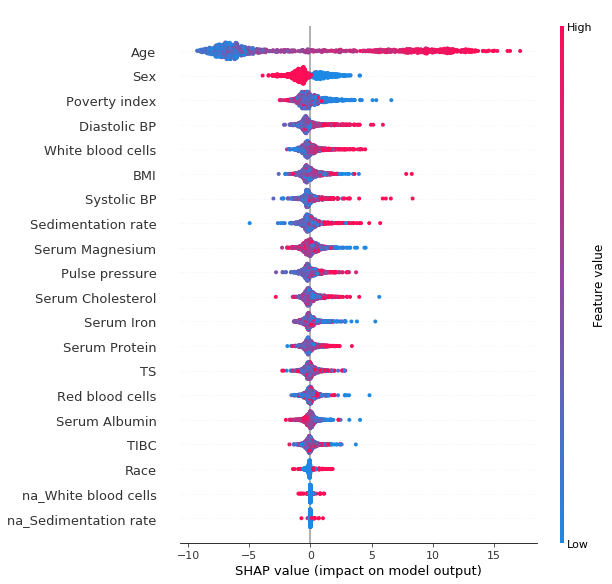

In [7]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

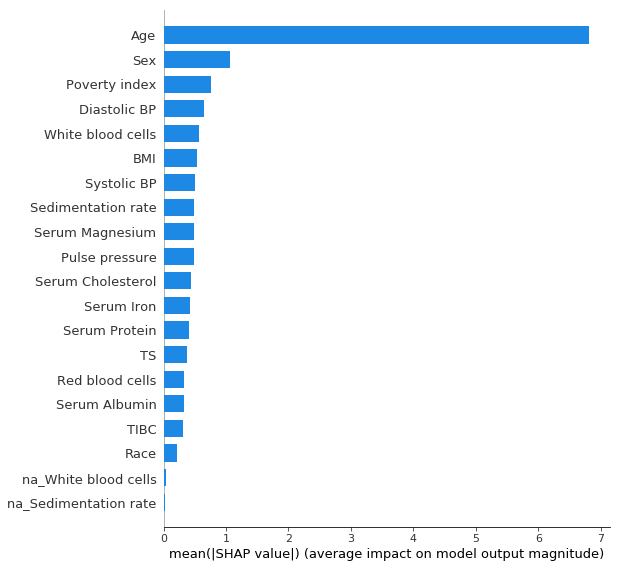

In [8]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Interactions

In [13]:
interact = explainer.shap_interaction_values(X_test[0:100])

In [14]:
shap.dependence_plot(('AGE','SEX'), interact, X_test[0:100])

KeyError: 0

In [ ]:
shap.summary_plot(shap_interaction_values, X_test[0:100])